In [4]:
!pip install xgboost

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [9]:
df = pd.read_csv("Desktop/Jeez/train.csv", parse_dates=['Ship Date', 'Order Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [11]:
df.shape

(9800, 18)

In [12]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


<Axes: xlabel='Ship Mode'>

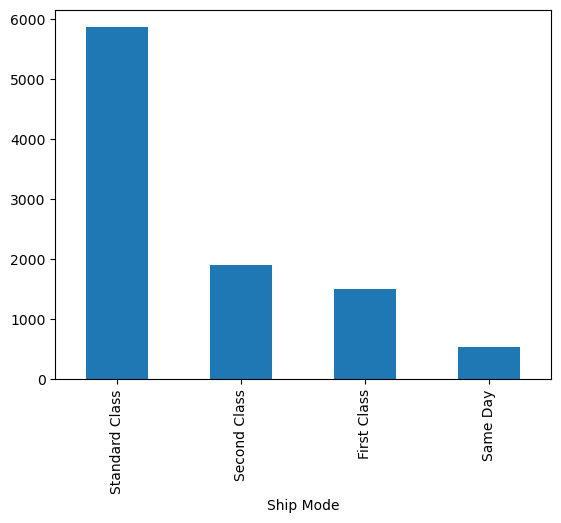

In [13]:
df['Ship Mode'].value_counts().plot(kind='bar')

In [14]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [15]:
top5 = df['City'].value_counts()

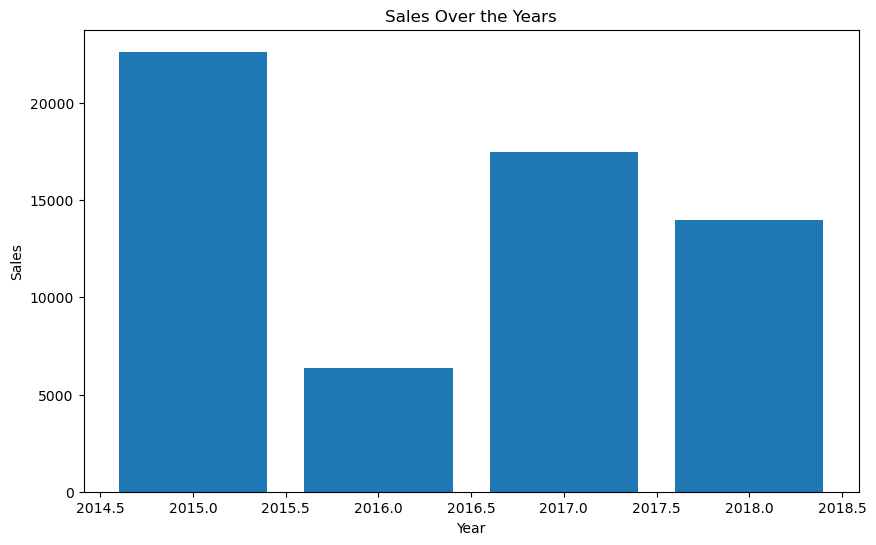

In [20]:
import matplotlib.pyplot as plt
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
fig = plt.figure(figsize=(10, 6))
plt.bar(df['Order Date'].dt.year, df['Sales'])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Over the Years')
plt.show()


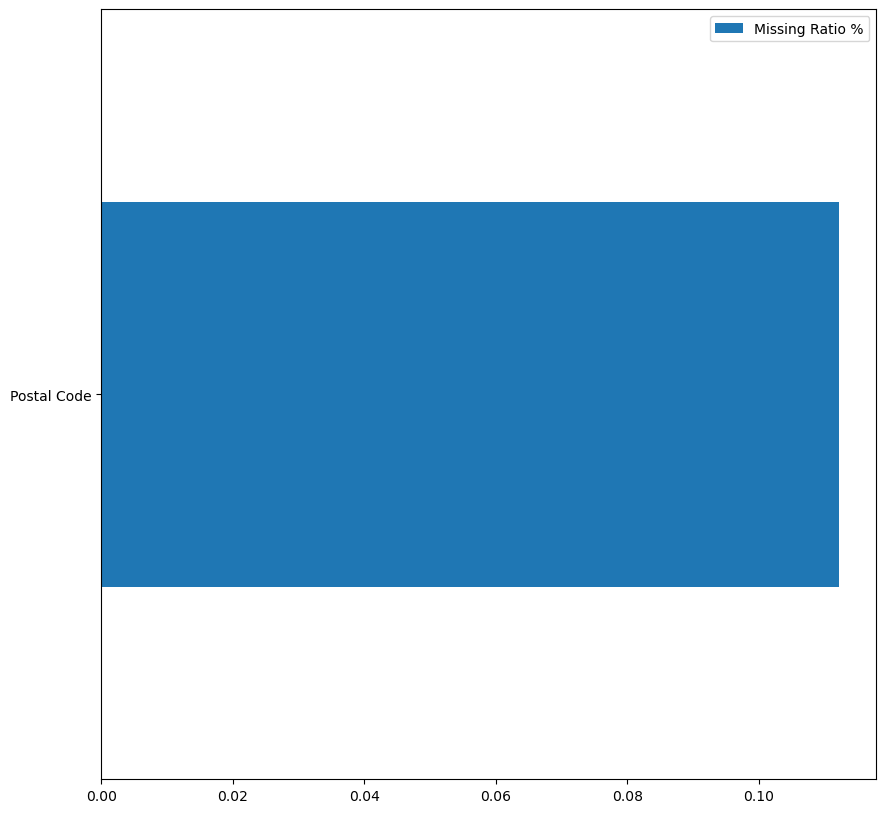

In [21]:
def plot_nas(bull: pd.DataFrame):
   
    if bull.isnull().sum().sum() != 0:
        na_df = (bull.isnull().sum() / len(bull)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
       
        missing_data.plot(kind = "barh",figsize=(10,10))
       
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

In [22]:
df.describe()

,Row ID,Order Date,Postal Code,Sales
count,9800.000000,9800,9789.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,55273.322403,230.769059
min,1.000000,2015-01-03 00:00:00,1040.000000,0.444000
25%,2450.750000,2016-05-24 00:00:00,23223.000000,17.248000
50%,4900.500000,2017-06-26 00:00:00,58103.000000,54.490000
75%,7350.250000,2018-05-15 00:00:00,90008.000000,210.605000
max,9800.000000,2018-12-30 00:00:00,99301.000000,22638.480000
std,2829.160653,NaN,32041.223413,626.651875


In [23]:
df.drop("Row ID", inplace = True, axis=1)

In [24]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [25]:
import warnings
warnings.filterwarnings('ignore')

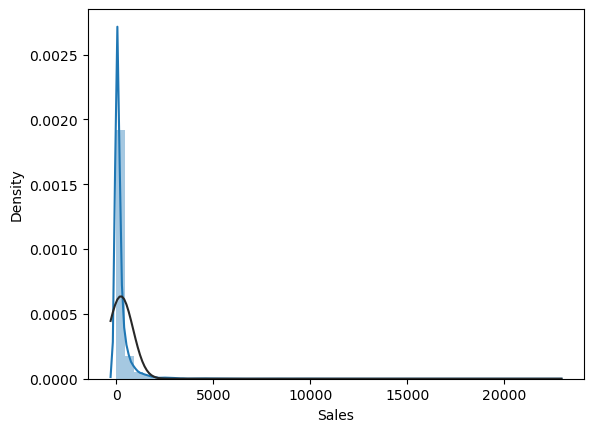

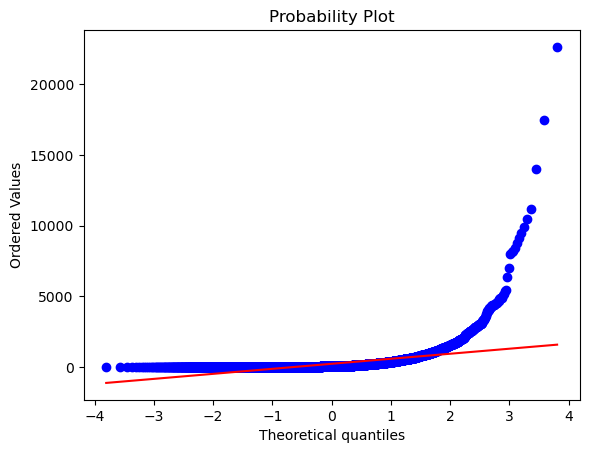

In [26]:
sns.distplot(df['Sales'],fit=norm);
fig = plt.figure()
res = stats.probplot(df['Sales'], plot=plt)

In [27]:
df.dropna(inplace = True)

In [28]:
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [29]:
df.drop(['Customer Name','City', 'Product Name'] , axis = 1, inplace = True)

In [30]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales
0,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Consumer,United States,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Consumer,United States,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Corporate,United States,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Consumer,United States,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Consumer,United States,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [31]:
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [33]:
df['Postal Code'] = df['Postal Code'].astype('object')

In [34]:
df['Postal Code'].dtype

dtype('O')

In [35]:
df['Segment'].value_counts()

Segment
Consumer       5096
Corporate      2948
Home Office    1745
Name: count, dtype: int64

In [36]:
df['State'].value_counts()

State
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada  

In [37]:
df['Region'].value_counts()

Region
West       3140
East       2774
Central    2277
South      1598
Name: count, dtype: int64

In [38]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Ship Month'] = df['Ship Date'].dt.month
#df['Deliver Days'] = df['Ship Date'] - df['Order Date']
#df['Ship Month'] = df['Ship Date'].dt.month
#df['Order Day'] = df['Order Date'].dt.day
#df['Ship Day'] = df['Ship Date'].dt.day
df['time to deliver'] = df['Ship Month'] - df['Month']

AttributeError: Can only use .dt accessor with datetimelike values

In [39]:
import pandas as pd

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Ship Month'] = df['Ship Date'].dt.month
df['time to deliver'] = df['Ship Month'] - df['Month']


In [40]:
#df.drop(['Deliever Days'], inplace = True, axis =1)

In [41]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Year,Month,Ship Month,time to deliver
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,11,11,0
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,11,11,0
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,United States,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,6,6,0
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,957.5775,2016,10,10,0
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,10,10,0


In [42]:
df['time to deliver'].value_counts()

time to deliver
 0     8650
 1      990
-11     149
Name: count, dtype: int64

In [43]:
df = df[df['time to deliver'] > 0]

In [44]:
df.shape

(990, 18)

In [45]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Year,Month,Ship Month,time to deliver
18,CA-2015-143336,2015-08-27,2015-09-01,Second Class,ZD-21925,Consumer,United States,California,94109.0,West,OFF-AR-10003056,Office Supplies,Art,8.560,2015,8,9,1
19,CA-2015-143336,2015-08-27,2015-09-01,Second Class,ZD-21925,Consumer,United States,California,94109.0,West,TEC-PH-10001949,Technology,Phones,213.480,2015,8,9,1
20,CA-2015-143336,2015-08-27,2015-09-01,Second Class,ZD-21925,Consumer,United States,California,94109.0,West,OFF-BI-10002215,Office Supplies,Binders,22.720,2015,8,9,1
66,US-2016-164175,2016-04-30,2016-05-05,Standard Class,PS-18970,Home Office,United States,Illinois,60610.0,Central,FUR-CH-10001146,Furniture,Chairs,213.115,2016,4,5,1
72,US-2016-134026,2016-04-26,2016-05-02,Standard Class,JE-15745,Consumer,United States,Tennessee,38109.0,South,FUR-CH-10000513,Furniture,Chairs,831.936,2016,4,5,1


In [46]:
from sklearn.preprocessing import OrdinalEncoder

In [47]:
df.drop('Country', inplace = True, axis = 1)

In [48]:
ordinal_encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1 )

In [49]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 18 to 9790
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         990 non-null    object        
 1   Order Date       990 non-null    datetime64[ns]
 2   Ship Date        990 non-null    datetime64[ns]
 3   Ship Mode        990 non-null    object        
 4   Customer ID      990 non-null    object        
 5   Segment          990 non-null    object        
 6   State            990 non-null    object        
 7   Postal Code      990 non-null    object        
 8   Region           990 non-null    object        
 9   Product ID       990 non-null    object        
 10  Category         990 non-null    object        
 11  Sub-Category     990 non-null    object        
 12  Sales            990 non-null    float64       
 13  Year             990 non-null    int32         
 14  Month            990 non-null    int32       

In [51]:
X = df.drop(['Sales'], axis=1)
y = df['Sales']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [53]:
X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])

In [54]:
X_test[object_cols] = ordinal_encoder.transform(X_test[object_cols])

In [55]:
X_train.shape

(792, 16)

In [56]:
X.shape

(990, 16)

In [57]:
X_test.shape

(198, 16)

In [58]:
corr = X_train.corr()

In [59]:
mask = np.triu(corr)

<Axes: >

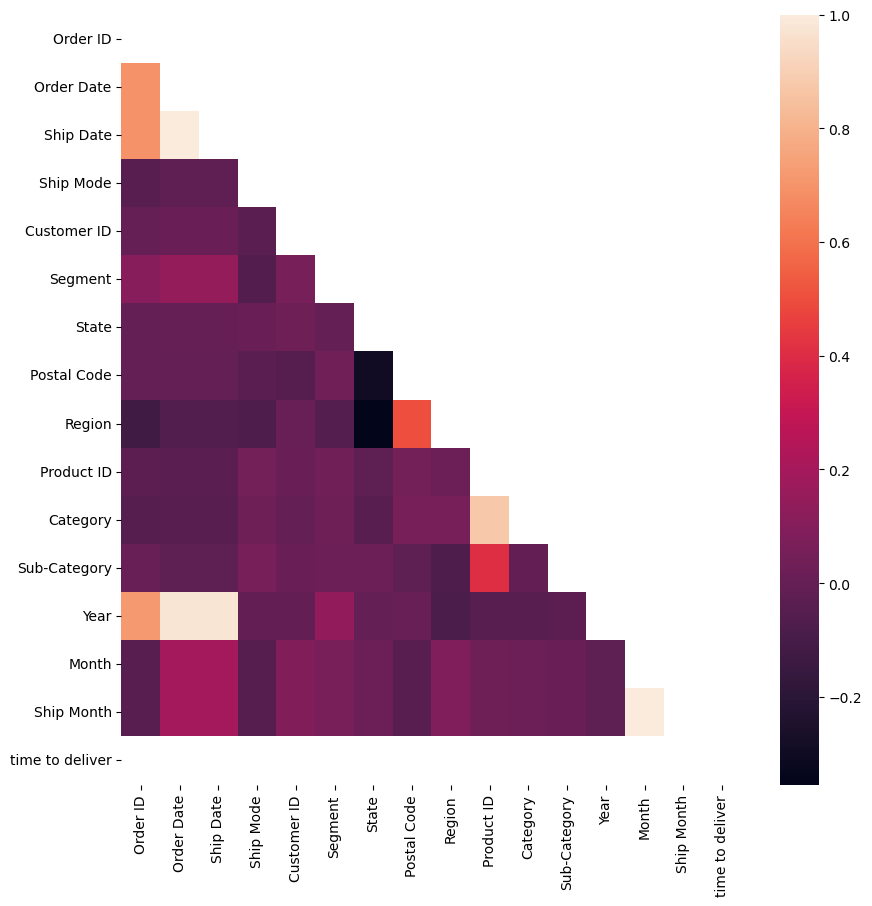

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=mask, annot = True)

In [61]:
X_train.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,State,Postal Code,Region,Product ID,Category,Sub-Category,Year,Month,Ship Month,time to deliver
5333,2.0,2015-08-26,2015-09-01,2.0,197.0,0.0,6.0,39.0,1.0,77.0,0.0,9.0,2015,8,9,1
948,442.0,2018-11-28,2018-12-02,2.0,296.0,2.0,32.0,35.0,1.0,63.0,0.0,9.0,2018,11,12,1
2446,73.0,2016-09-25,2016-10-01,2.0,16.0,0.0,3.0,187.0,3.0,288.0,1.0,7.0,2016,9,10,1
8683,266.0,2018-11-25,2018-12-01,2.0,358.0,0.0,3.0,206.0,3.0,181.0,1.0,2.0,2018,11,12,1
3365,16.0,2015-01-31,2015-02-02,0.0,218.0,0.0,3.0,200.0,3.0,12.0,0.0,4.0,2015,1,2,1


In [62]:
time_cols_train = X_train[['Order Date', 'Ship Date']]
time_cols_test = X_test[['Order Date', 'Ship Date']]

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 5333 to 997
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         792 non-null    float64       
 1   Order Date       792 non-null    datetime64[ns]
 2   Ship Date        792 non-null    datetime64[ns]
 3   Ship Mode        792 non-null    float64       
 4   Customer ID      792 non-null    float64       
 5   Segment          792 non-null    float64       
 6   State            792 non-null    float64       
 7   Postal Code      792 non-null    float64       
 8   Region           792 non-null    float64       
 9   Product ID       792 non-null    float64       
 10  Category         792 non-null    float64       
 11  Sub-Category     792 non-null    float64       
 12  Year             792 non-null    int32         
 13  Month            792 non-null    int32         
 14  Ship Month       792 non-null    int32      

In [64]:
X_train.drop(columns=time_cols_train.columns, inplace=True, axis =1)
X_test.drop(columns=time_cols_test.columns, inplace=True, axis=1)

In [65]:
X_train = X_train.values
X_test = X_test.values

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
X_train.shape

(792, 14)

In [68]:
y_test.shape

(198,)

In [69]:
type(y_test), type(y_train)

(pandas.core.series.Series, pandas.core.series.Series)

In [70]:
from xgboost import XGBRegressor
import math
from sklearn.metrics import mean_squared_error

model = XGBRegressor(learning_rate=0.03, max_depth=1,)
model.fit(X_train, y_train)

preds = model.predict(X_test)
rmse_xgb = math.sqrt(mean_squared_error(y_test, preds))

print("Root Mean Squared Error for XGBoost:", rmse_xgb)

Root Mean Squared Error for XGBoost: 333.4952758463503


In [71]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [72]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [73]:
pred1 = rf.predict(X_test)

In [74]:
rmse_rf = math.sqrt(mean_squared_error(y_test, pred1))

In [75]:
rmse_rf

530.1995575048484